### Step 0: load the data

In [1]:
import pandas as pd

df_commodities_flat = pd.read_csv('commodities_per_year.tsv',sep='\t').drop('Unnamed: 0',axis=1)

In [2]:
### Looking at broad labels to group commodities by categories
# import requests
# from bs4 import BeautifulSoup
import json

name_by_uri = json.load(open('preferred_label_by_uri.json','r'))
broad_label_by_uri = json.load(open('broad_label_by_uri.json','r'))
broad_label_by_name = json.load(open('broad_label_by_name.json','r'))
parent_uri = json.load(open('parent_uri.json','r'))
# try:
#     broadest_cache = json.load(open('broadest_label_cache.json','r'))
# except: # file doesn't exist yet
#     broadest_cache = {} 
# one_level_broader_url = {} # building a tree of concepts in the process
# one_level_broader_label = {}


FileNotFoundError: [Errno 2] No such file or directory: 'preferred_label_by_uri.json'

In [89]:
def get_second_broadest_label(url, cur_label=''):
#     print(url, cur_label)
    '''
    Recursively looking for the second-broadest label in the thesaurus
    '''
    if url not in parent_uri: # can't go any higher
        return cur_label
    new_url = parent_uri[url]
    new_label = name_by_uri[new_url] if new_url in name_by_uri else name_by_uri[url]
    return get_second_broadest_label(new_url, new_label)

In [83]:
url = df_commodities_flat[df_commodities_flat['broad_label']=='Vaartuigen'].iloc[1]['url']
get_second_broadest_label(url,'')

https://digitaalerfgoed.poolparty.biz/globalise/511e4b40-26a7-4da2-b758-a57699c697d0 
https://digitaalerfgoed.poolparty.biz/globalise/b3028509-1a4a-46f7-84ac-570ea0017c40 Machines en transportmiddelen


'Machines en transportmiddelen'

In [ ]:
# def get_second_broadest_label(url, prev_label=''): 
#     '''
#         For a commodity url, get its category in the thesaurus.
#         "second-broadest" because it should be broad but still informative
#     '''
#     if url in broadest_cache: # a broader label exists
# #         print('Found: ',broadest_cache[url])
#         return broadest_cache[url]
#     resp = requests.get(url)
#     soup = BeautifulSoup(resp.content,'lxml')
#     cur_label = soup.find_all('div', {'about':url, 'id':'nl'})[0].find('h1').text 
    
#     ### going one level up
#     start_points = soup.find_all('a', {'href':'http://www.w3.org/2004/02/skos/core#broader'})
#     if not start_points: # can't go any higher:
#         if prev_label:
#             return prev_label
#         return cur_label
#     start = start_points[1] # first one is en, next one is nl, we want nl
#     new_url = start.find_next('a')['href'] # we stop one level early:  not "goederen"

#     one_level_broader_url[url] = new_url
#     one_level_broader_label[prev_label] = cur_label
#     label = get_second_broadest_label(new_url, prev_label = cur_label)   
#     broadest_cache[url] = label
#     return label

In [97]:
df_commodities_flat

,date,url,label,broad_label
0,1610-02-25,https://digitaalerfgoed.poolparty.biz/globalis...,ui,NOT YET CLASSIFIED
1,1611-07-18,https://digitaalerfgoed.poolparty.biz/globalis...,Noten,Voedsel en levende dieren
2,1611-07-18,https://digitaalerfgoed.poolparty.biz/globalis...,Kruidnagel,Voedsel en levende dieren
3,1611-07-18,https://digitaalerfgoed.poolparty.biz/globalis...,Was,"Dierlijke en plantaardige oliën, vetten en wassen"
4,1611-07-18,https://digitaalerfgoed.poolparty.biz/globalis...,leer,"Verwerkte goederen, hoofdzakelijk ingedeeld na..."
...,...,...,...,...
20374,1766-04-08,https://digitaalerfgoed.poolparty.biz/globalis...,mal,NOT YET CLASSIFIED
20375,1766-04-08,https://digitaalerfgoed.poolparty.biz/globalis...,militair,NOT YET CLASSIFIED
20376,1766-04-08,https://digitaalerfgoed.poolparty.biz/globalis...,mossel,NOT YET CLASSIFIED
20377,1766-04-08,https://digitaalerfgoed.poolparty.biz/globalis...,scheepje,NOT YET CLASSIFIED


In [57]:
# from tqdm.notebook import tqdm_notebook # progress bar
# tqdm_notebook.pandas()

In [90]:
df_commodities_flat['broad_label'] = df_commodities_flat['url'].map(get_second_broadest_label)

In [92]:
### Commodities map to categories
broad_labels_dict = {label:broad_label
                    for index,date,url,label,broad_label, in df_commodities_flat.itertuples()}

broad_labels_dict 

{'ui': 'NOT YET CLASSIFIED',
 'Noten': 'Voedsel en levende dieren',
 'Kruidnagel': 'Voedsel en levende dieren',
 'Was': 'Dierlijke en plantaardige oliën, vetten en wassen',
 'leer': 'Verwerkte goederen, hoofdzakelijk ingedeeld naar materiaal',
 'serge': 'Verwerkte goederen, hoofdzakelijk ingedeeld naar materiaal',
 'ras': 'Verwerkte goederen, hoofdzakelijk ingedeeld naar materiaal',
 'lont': 'Verwerkte goederen, hoofdzakelijk ingedeeld naar materiaal',
 'Steen': 'Verwerkte goederen, hoofdzakelijk ingedeeld naar materiaal',
 'Tot slaaf gemaakte': 'Personen behandeld als goederen',
 'Kist': 'Verwerkte goederen, hoofdzakelijk ingedeeld naar gebruik',
 'Kas': 'Verwerkte goederen, hoofdzakelijk ingedeeld naar gebruik',
 'Spaan': 'NOT YET CLASSIFIED',
 'Mes': 'Verwerkte goederen, hoofdzakelijk ingedeeld naar gebruik',
 'Kast': 'Verwerkte goederen, hoofdzakelijk ingedeeld naar gebruik',
 'sloep': 'Machines en transportmiddelen',
 'Vaartuigen': 'Machines en transportmiddelen',
 'Want': 'Verwer

In [95]:
### Some commodities are either "not yet classified" or too broad, let's put them in a separate category
unclassified = [key for key,value in broad_labels_dict.items() if key==value]
for commodity in unclassified:
    broad_labels_dict[commodity]='Andere goederen'

In [99]:
### Categories mapped to commodities they contain
broad_labels_dict_reverse = {}

for commodity, category in broad_labels_dict.items():
    if category in broad_labels_dict_reverse:
        broad_labels_dict_reverse[category].append(commodity)
    else:
        broad_labels_dict_reverse[category] = [commodity]
broad_labels_dict_reverse

{'NOT YET CLASSIFIED': ['ui',
  'Spaan',
  'boot',
  'vrucht',
  'gesp',
  'vel',
  'wortelen',
  'plaat',
  'geit',
  'loop',
  'pers',
  'boom',
  'hals',
  'jongen',
  'kaju',
  'kiel',
  'mal',
  'sabel',
  'vlag',
  'slot',
  'span',
  'bord',
  'Tan',
  'kit',
  'bast',
  'kam',
  'dier',
  'lijst',
  'pauw',
  'kop',
  'kruis',
  'trom',
  'veer',
  'cargasoen',
  'zadel',
  'prop',
  'stoel',
  'scherp',
  'gulden',
  'hert',
  'prauw',
  'schap',
  'roer',
  'comptoir',
  'hoorn',
  'goteling',
  'kano',
  'valk',
  'verversing',
  'soldij',
  'veren',
  'smijt',
  'lei',
  'ballast',
  'ambergris',
  'amber',
  'geld',
  'mand',
  'rantsoen',
  'japon',
  'bout',
  'gage',
  'slag',
  'tafel',
  'toom',
  'avance',
  'levensmiddelen',
  'militair',
  'rand',
  'tas',
  'hellebaard',
  'bierglas',
  'koker',
  'ketting',
  'stormhoed',
  'gevest',
  'schar',
  'bras',
  'beker',
  'robijn',
  'spies',
  'kaart',
  'neut',
  'kruit',
  'retouren',
  'pul',
  'eend',
  'weel',
 

In [100]:
### Saving for the future 
json.dump(broad_labels_dict,open('broad_labels_dict.json','w'))
json.dump(broad_labels_dict_reverse,open('commodities_per_broad_label.json','w'))
json.dump(broadest_cache,open('broadest_label_cache.json','w'))

In [133]:
### Checking and saving a tree of labels
# missing_labels = set([x for x in df_commodities_flat['label'].tolist() if not x in one_level_broader_label])
# for _, date, url, label, broad_label, _ in df_commodities_flat.itertuples():
#     if label in missing_labels:
#         broader_url = one_level_broader_url[url] # all urls are there
#         broader_label = get_preferred_label(broader_url)
#         one_level_broader_label[label] = broader_label
        
# assert set([x for x in df_commodities_flat['label'].tolist() if not x in one_level_broader_label]) == set()
# json.dump(one_level_broader_label, open('one_level_broader_label.json','w'))
# json.dump(one_level_broader_url, open('one_level_broader_url.json','w'))

In [134]:
# df_commodities_flat

### Step 1: prepare the timeline

In [101]:
import datetime

all_dates = sorted(set(df_commodities_flat['date'].tolist()))

In [102]:
year, month, day = (int(item) for item in all_dates[0].split('-'))
first_date = datetime.date(year ,month,day)
year, month, day = (int(item) for item in all_dates[-1].split('-'))
last_date = datetime.date(year ,month,day)

In [103]:
delta = last_date-first_date
delta

datetime.timedelta(57020)

In [105]:
appearances = {}
all_commodities = sorted(set(df_commodities_flat['label'].tolist()))
for commodity in all_commodities:
    df_target = df_commodities_flat[df_commodities_flat['label']==commodity]
    dates_appeared = df_target['date'].tolist()
    appearances[commodity] = []
    for num_days in range(delta.days):
        date = str(first_date+datetime.timedelta(num_days))
        if date in dates_appeared:
            appearances[commodity].append(num_days)
    

### Step 2: visualise commodities over time for an overview

In [106]:
records = [{'commodity':key,
           'days': value} for key,value in appearances.items()]

In [107]:
df_appearances = pd.DataFrame.from_records(records)
df_appearances.to_csv('commodities_by_num_days_since_first_letter.tsv',sep='\t') # for further analysis

In [109]:
all_categories = list(broad_labels_dict_reverse.keys())
sorted(all_categories)

['Chemicaliën en verwante producten, n.e.g.',
 'Dierlijke en plantaardige oliën, vetten en wassen',
 'Dranken en Tabak',
 'Machines en transportmiddelen',
 'Minerale brandstoffen, smeermiddelen en gerelateerd materieel',
 'NOT YET CLASSIFIED',
 'Niet elders geclasificeerde goederen en transacties',
 'Personen behandeld als goederen',
 'Ruwe materialen, oneetbaar, behalve brandstoffen',
 'Vergoedingen en geldbedragen met een specifiek doel',
 'Verwerkte goederen, hoofdzakelijk ingedeeld naar gebruik',
 'Verwerkte goederen, hoofdzakelijk ingedeeld naar materiaal',
 'Voedsel en levende dieren']

In [110]:
### Interactively choosing and visualising a subset of commodities

In [111]:
import ipywidgets
from IPython.display import display
style = {'description_width': 'initial'}

In [112]:
dir(ipywidgets)

['Accordion',
 'BoundedFloatText',
 'BoundedIntText',
 'Box',
 'Button',
 'ButtonStyle',
 'CallbackDispatcher',
 'Checkbox',
 'Color',
 'ColorPicker',
 'Controller',
 'CoreWidget',
 'DOMWidget',
 'DatePicker',
 'Datetime',
 'Dropdown',
 'FloatLogSlider',
 'FloatProgress',
 'FloatRangeSlider',
 'FloatSlider',
 'FloatText',
 'HBox',
 'HTML',
 'HTMLMath',
 'Image',
 'IntProgress',
 'IntRangeSlider',
 'IntSlider',
 'IntText',
 'Label',
 'Layout',
 'NumberFormat',
 'Output',
 'Password',
 'Play',
 'RadioButtons',
 'Select',
 'SelectMultiple',
 'SelectionRangeSlider',
 'SelectionSlider',
 'SliderStyle',
 'Style',
 'Tab',
 'Text',
 'Textarea',
 'ToggleButton',
 'ToggleButtons',
 'ToggleButtonsStyle',
 'VBox',
 'Valid',
 'ValueWidget',
 'Widget',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__jupyter_widgets_base_version__',
 '__jupyter_widgets_controls_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__protocol_version__',
 '__spec__',
 '__version__',
 '_ha

In [123]:
checkboxes = [ipywidgets.Checkbox(value=False, description=label) for label in all_categories]
output = ipywidgets.VBox(children=checkboxes)
display(output)

selected_data = []
for i in range(0, len(checkboxes)):
    if checkboxes[i].value:
        selected_data.append(data[str([checkboxes[i].description][0])])
print(selected_data)

[]


In [119]:
test = ipywidgets.ToggleButtons(
    options=all_categories,
    description='Category:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=all_categories,
#     icons=['check'] * 3
)
display(test)

ToggleButtons(description='Category:', icons=('check', 'check', 'check'), options=('NOT YET CLASSIFIED', 'Voed…

In [115]:
choose_category = ipywidgets.SelectMultiple(options=sorted(all_categories), 
                                      description='Choose categories of commodities')#,style=style)
display(choose_category)

SelectMultiple(description='Choose categories of commodities', options=('Chemicaliën en verwante producten, n.…

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns # to make things beautiful

In [17]:
palette = sns.color_palette('''#00876c
#3e9669
#65a465
#8bb162
#b2bd62
#dac767
#deae53
#e19448
#e17945
#dd5c48
#d43d51'''.split('\n')) # from https://www.learnui.design/tools/data-color-picker.html#divergent
palette

[(0.0, 0.5294117647058824, 0.4235294117647059),
 (0.24313725490196078, 0.5882352941176471, 0.4117647058823529),
 (0.396078431372549, 0.6431372549019608, 0.396078431372549),
 (0.5450980392156862, 0.6941176470588235, 0.3843137254901961),
 (0.6980392156862745, 0.7411764705882353, 0.3843137254901961),
 (0.8549019607843137, 0.7803921568627451, 0.403921568627451),
 (0.8705882352941177, 0.6823529411764706, 0.3254901960784314),
 (0.8823529411764706, 0.5803921568627451, 0.2823529411764706),
 (0.8823529411764706, 0.4745098039215686, 0.27058823529411763),
 (0.8666666666666667, 0.3607843137254902, 0.2823529411764706),
 (0.8313725490196079, 0.23921568627450981, 0.3176470588235294)]

In [18]:
from textwrap import wrap # to add a linebreak for long labels

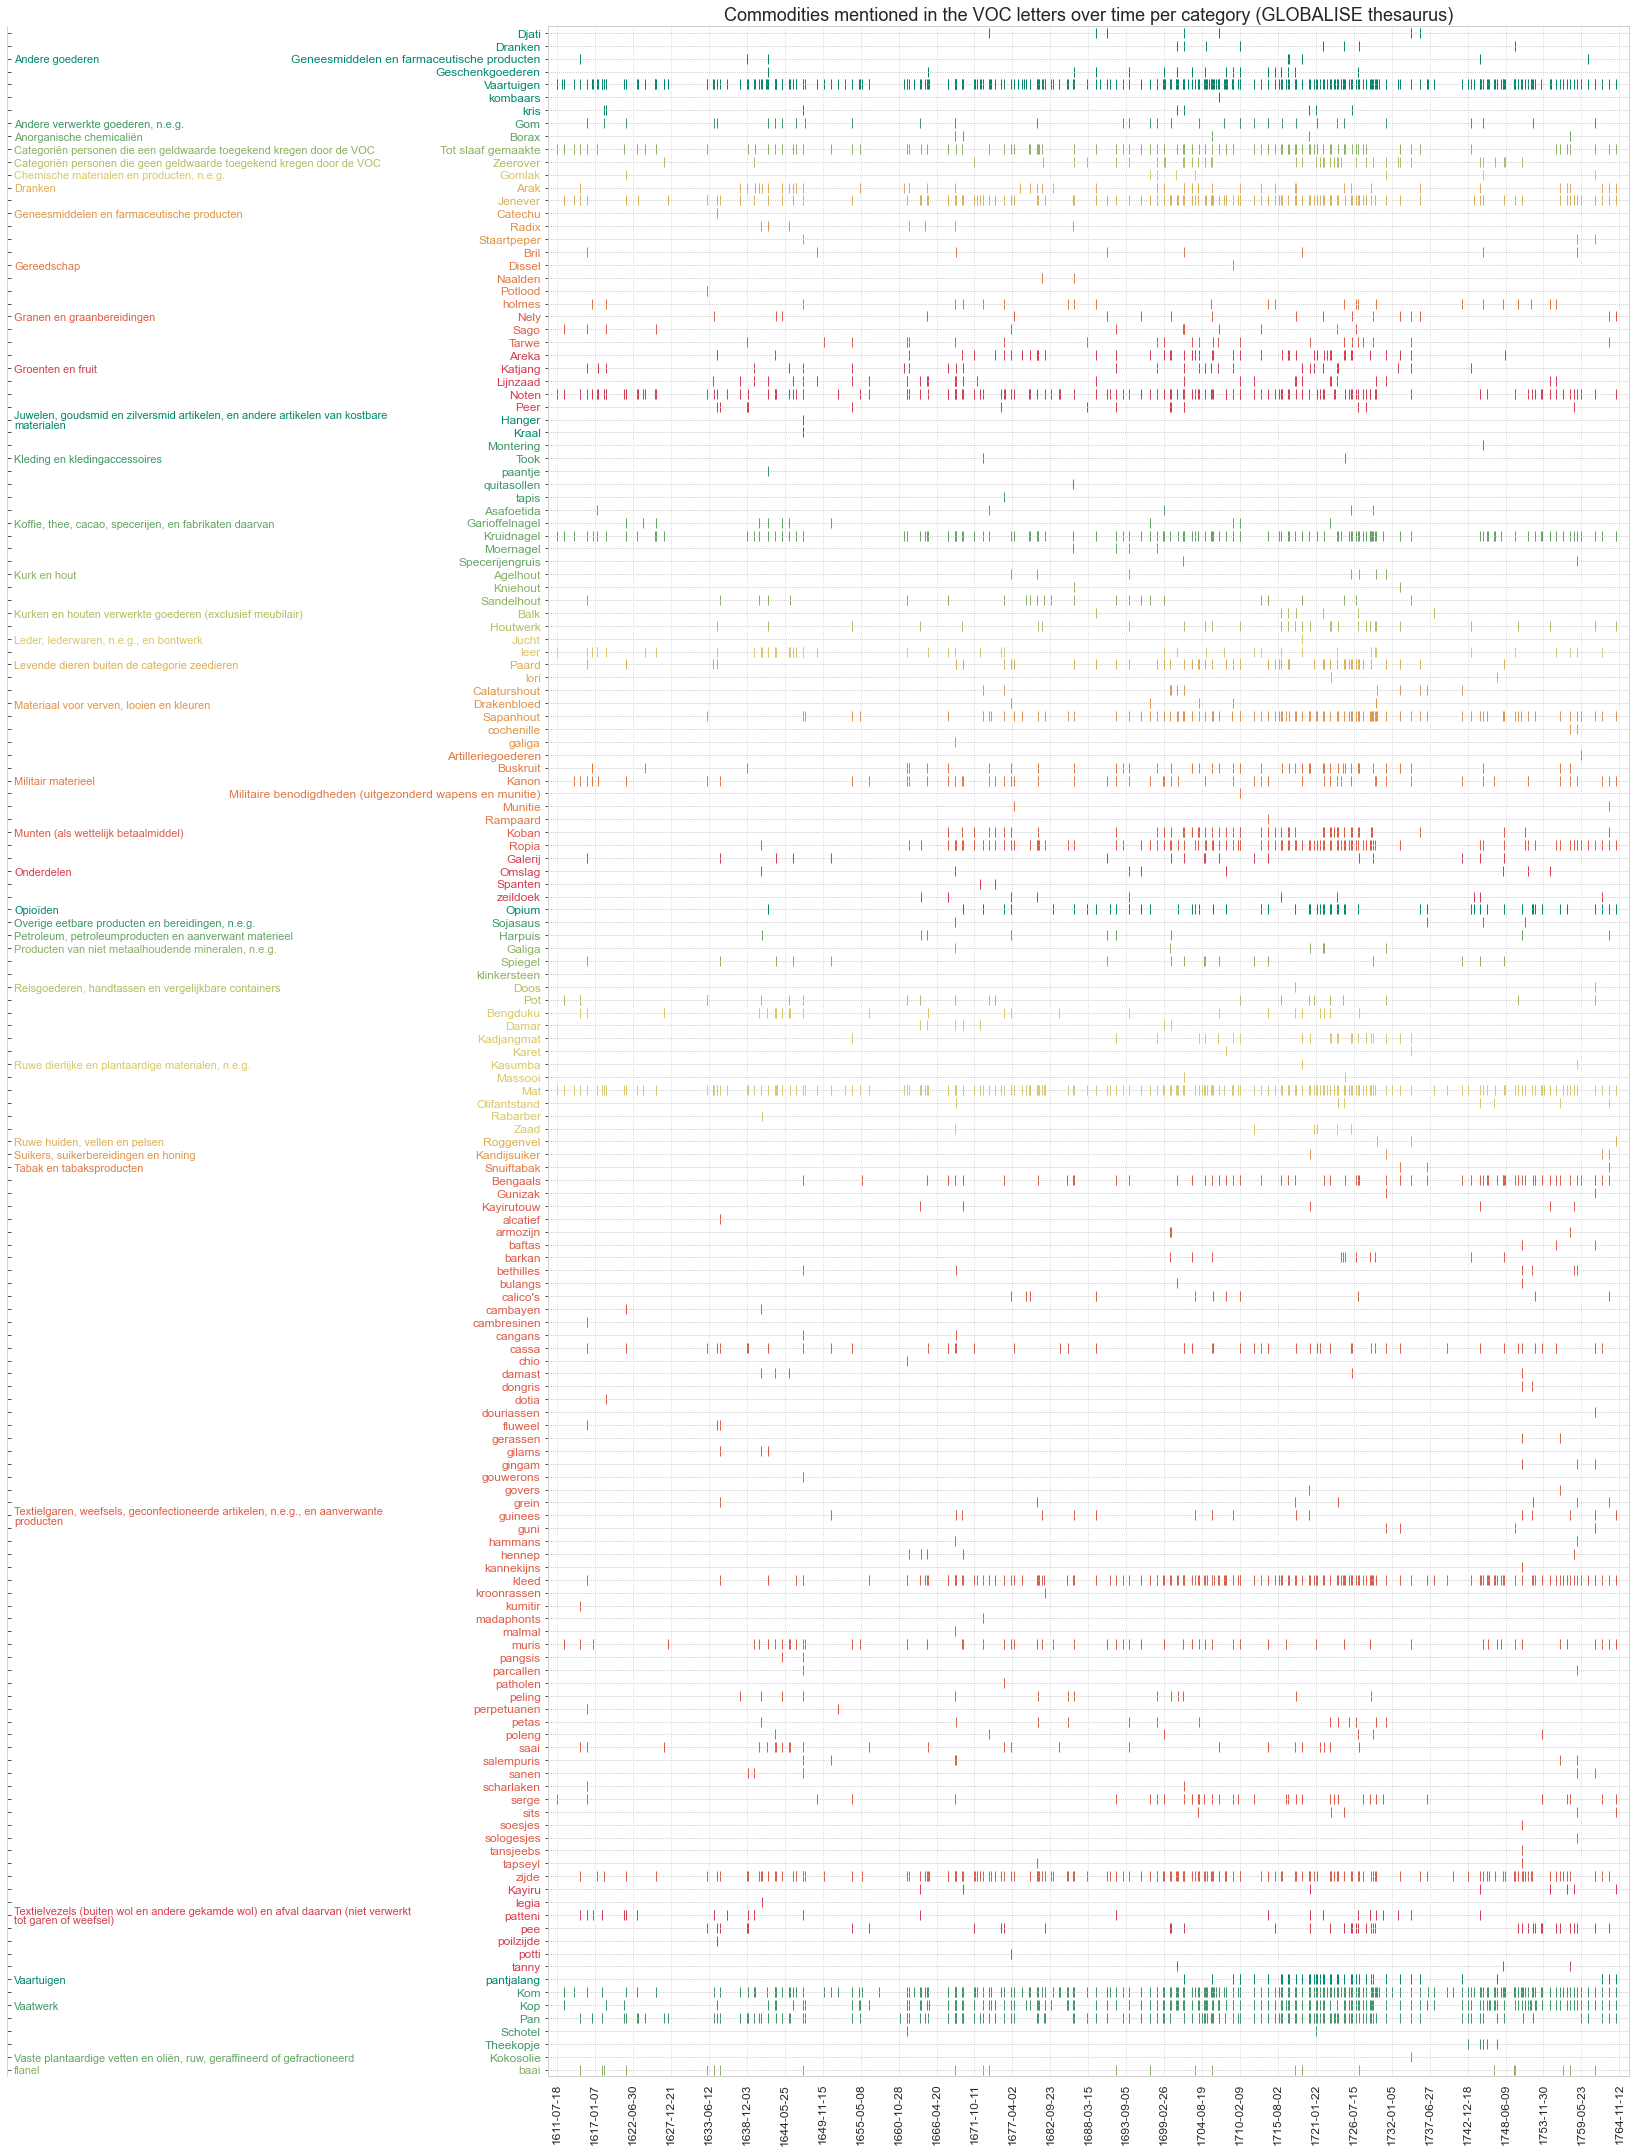

In [20]:
### Creating a figure
plt.figure(figsize=(30, 30))
sns.set_style("whitegrid", {'grid.linestyle': ':'})

### Plotting appearances of each commodity, where colour depends on category
cnt = 0
colours_per_commodity = [palette[i%len(palette)] # colours repeat cyclically (otherwise the palette would be huge)
                         for i, category in enumerate(sorted(all_categories))
                         for commodity in broad_labels_dict_reverse[category]
                        ] # one category = one colour

for i, category in enumerate(sorted(all_categories)):
    for commodity in sorted(broad_labels_dict_reverse[category]):
        plt.plot(appearances[commodity], [cnt] * len(appearances[commodity]), '|', markersize=10,
                    color=colours_per_commodity[cnt])
        cnt += 1 # next commodity
            
plt.tight_layout() # a smaller plot is more readable
first_graph = plt.gca() # stands for "get current axis"

### Adding labels and settings to the plot
first_graph.set_yticks(range(len(all_commodities)))
first_graph.set_yticklabels([commodity 
                             for category in sorted(all_categories)
                             for commodity in sorted(broad_labels_dict_reverse[category])
                            ], fontsize=12) # labels on the y-axis, sorted alphabetically
for ytick, colour in zip(first_graph.get_yticklabels(), colours_per_commodity):
    ytick.set_color(colour) # labels are also coloured

### Setting ticks and labels on the x-axis
first_graph.set_xticks(range(0, delta.days, 2000))
first_graph.set_xticklabels([str(first_date+datetime.timedelta(days)) for days in range(0, delta.days, 2000)],
                            rotation=90,fontsize=12)

first_graph.invert_yaxis() # the first label should be on top

### Adjusting the axis limits
miny, nexty, *_, maxy = first_graph.get_yticks() # get the first two and last y-tick positions
epsy = (nexty - miny) / 2  # compute half the y-tick interval (for example)
first_graph.set_ylim(maxy+epsy, miny-epsy) # adjust the limits
minx, nextx, *_, maxx = first_graph.get_xticks() # same for the x-axis
epsx = (nextx - minx) / 4  
first_graph.set_xlim(minx-epsx, maxx+epsx) # nb: different order because the axis is not inverted


### Now, we want hierarchical labels on categories
### see example: https://stackoverflow.com/questions/37934242/hierarchical-axis-labeling
second_graph = first_graph.twinx() 
second_graph.spines["right"].set_position(("axes", -0.5))
second_graph.set_yticks(first_graph.get_yticks())

### Hiding repetitive category labels to make the graph more readable
clean_ticklabels = [] 
counts = {}
new_ticklabels = [broad_labels_dict[i.get_text()] for i in first_graph.get_yticklabels()] # categories
for label in new_ticklabels:
    if label not in counts: # new category begins
        counts[label] = 1
    else:
        counts[label] += 1
    
    if len(broad_labels_dict_reverse[label]) == 1: # category appears only once
        clean_ticklabels.append("\n".join(wrap(label,80))) # wrapping long labels
    else:
        if counts[label] == len(broad_labels_dict_reverse[label]) // 2: # put the label in the middle
            clean_ticklabels.append("\n".join(wrap(label,80)))
        else:
            clean_ticklabels.append('')           
second_graph.set_yticklabels(clean_ticklabels, fontsize=11, linespacing=0.95)

### Now, the colours per category
cnt = 0
for ytick in second_graph.get_yticklabels():
    if ytick.get_text():
        ytick.set_color(palette[cnt%len(palette)])
        cnt += 1
        
### Aligning with the original graph
second_graph.invert_yaxis()
second_graph.set_ylim(maxy+epsy, miny-epsy)

### Final touch
plt.title('Commodities mentioned in the VOC letters over time per category (GLOBALISE thesaurus)',
         fontdict={'fontsize':18})
plt.tight_layout() # yes, again - not sure why but it works
plt.savefig('plots/commodities_over_time.png',bbox_inches="tight") # make a folder called "plots" if you get an error

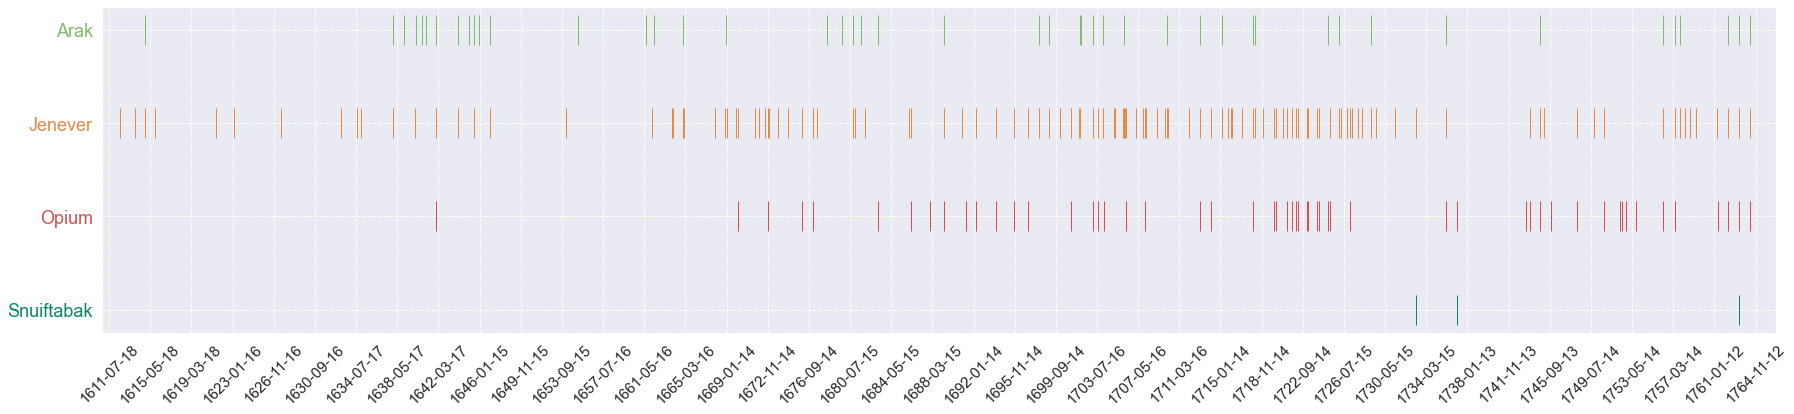

In [435]:
### Step 3.1: plot opium for our case study, first with other "unhealthy" commodities

bad_habit_commodities = ['Arak','Jenever','Opium','Snuiftabak']
plt.figure(figsize=(30, 6))
sns.set_style('darkgrid', {'grid.linestyle': '--'})

kleuren = sns.color_palette('''#7ebd6a
#e18b4d
#d44f51
#0c876c'''.split('\n')) # https://www.learnui.design/tools/data-color-picker.html#palette


for i, commodity in enumerate(bad_habit_commodities):
    plt.plot(appearances[commodity], [i] * len(appearances[commodity]), '|', markersize=30,
                    color=kleuren[i])
    
graph = plt.gca()

graph.set_yticks(range(0,len(bad_habit_commodities)))
graph.set_yticklabels(bad_habit_commodities,fontsize=18)
miny, nexty, *_, maxy = graph.get_yticks() # get the first two and last y-tick positions
epsy = (nexty - miny) / 4  # compute half the y-tick interval (for example)
graph.set_ylim(miny-epsy,maxy+epsy) # adjust the limits
graph.invert_yaxis()
for ytick, colour in zip(graph.get_yticklabels(), kleuren):
    ytick.set_color(colour) # labels are also coloured

graph.set_xticks(range(0, delta.days+450, 1400))
graph.set_xticklabels([str(first_date+datetime.timedelta(days)) for days in range(0, delta.days+450, 1400)],
                            rotation=45,fontsize=15)
minx, nextx, *_, maxx = graph.get_xticks() 
epsx = (nextx - minx) / 6  
graph.set_xlim(minx-epsx, maxx+epsx*3)

# plt.tight_layout()
plt.savefig('plots/opium_and_friends.png',bbox_inches="tight")

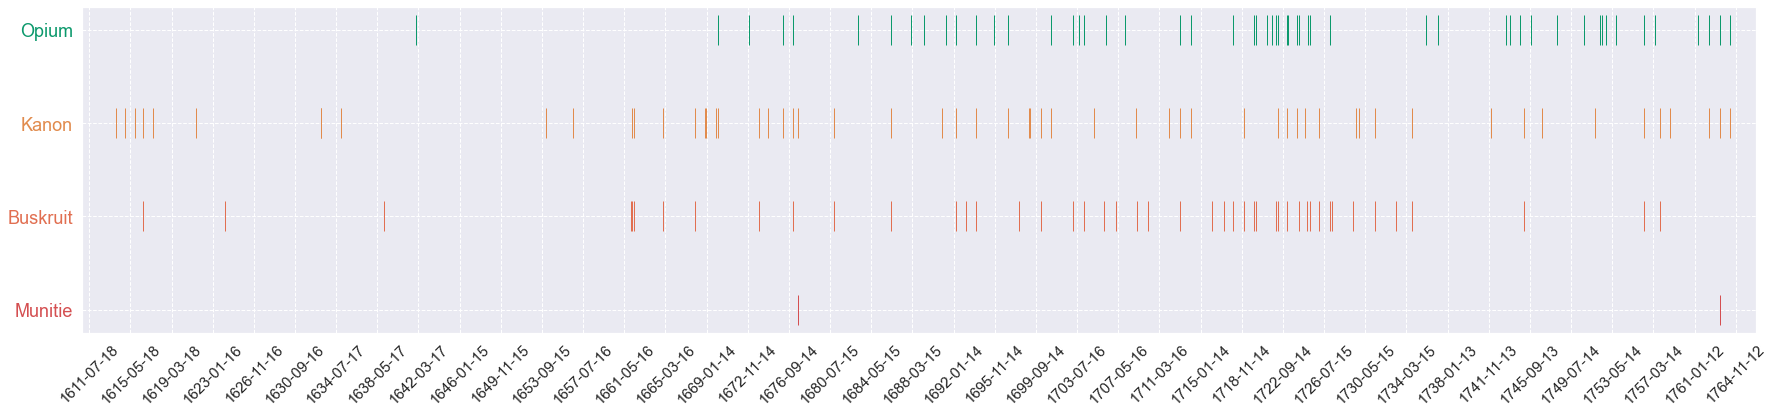

In [457]:
### Step 3.2: plot opium for our case study with military commodities

violent_commodities = ['Opium', 'Kanon','Buskruit','Munitie']
plt.figure(figsize=(30, 6))
sns.set_style('darkgrid', {'grid.linestyle': '--'})

kleuren = sns.color_palette('''#0c996c
#e18b4d
#e16f51
#d44f51'''.split('\n')) # https://www.learnui.design/tools/data-color-picker.html#palette


for i, commodity in enumerate(violent_commodities):
    plt.plot(appearances[commodity], [i] * len(appearances[commodity]), '|', markersize=30,
                    color=kleuren[i])
    
graph = plt.gca()

graph.set_yticks(range(0,len(violent_commodities)))
graph.set_yticklabels(violent_commodities,fontsize=18)
miny, nexty, *_, maxy = graph.get_yticks() # get the first two and last y-tick positions
epsy = (nexty - miny) / 4  # compute half the y-tick interval (for example)
graph.set_ylim(miny-epsy,maxy+epsy) # adjust the limits
graph.invert_yaxis()
for ytick, colour in zip(graph.get_yticklabels(), kleuren):
    ytick.set_color(colour) # labels are also coloured

graph.set_xticks(range(0, delta.days+450, 1400))
graph.set_xticklabels([str(first_date+datetime.timedelta(days)) for days in range(0, delta.days+450, 1400)],
                            rotation=45,fontsize=15)
minx, nextx, *_, maxx = graph.get_xticks() 
epsx = (nextx - minx) / 6  
graph.set_xlim(minx-epsx, maxx+epsx*3)

# plt.tight_layout()
plt.savefig('plots/opium_and_military.png',bbox_inches="tight")

In [456]:
sns.color_palette(["#0c9f6c"])

[(0.047058823529411764, 0.6235294117647059, 0.4235294117647059)]

In [455]:
int('d4',16)+int('e1',16) // 2

324

In [440]:
hex(int('d44f51',16)+int('e18b4d',16) // 2)

'0x14514f7'

#### OLD CODE BEGINS HERE
will be either refactored or deleted

In [291]:
last_date

datetime.date(1766, 4, 8)

In [9]:
# Step 3: plot how categories changed over time

In [243]:
df_categories = df_commodities_flat[['date','broad_label']]

In [244]:
df_categories

,date,broad_label
0,1611-07-18,Groenten en fruit
1,1611-07-18,"Koffie, thee, cacao, specerijen, en fabrikaten..."
2,1611-07-18,"Leder, lederwaren, n.e.g., en bontwerk"
3,1611-07-18,"Textielgaren, weefsels, geconfectioneerde arti..."
4,1611-07-18,Categoriën personen die een geldwaarde toegeke...
...,...,...
3673,1766-04-08,Vaatwerk
3674,1766-04-08,Vaartuigen
3675,1766-04-08,Vaatwerk
3676,1766-04-08,"Textielgaren, weefsels, geconfectioneerde arti..."


In [245]:
df_categories  = df_categories.groupby(df_categories.columns.tolist()).size().reset_index().\
    rename(columns={0:'count'})

In [246]:
df_categories = df_categories.sort_values(by=['date','broad_label'])
df_categories

,date,broad_label,count
0,1611-07-18,Categoriën personen die een geldwaarde toegeke...,1
1,1611-07-18,Groenten en fruit,1
2,1611-07-18,"Koffie, thee, cacao, specerijen, en fabrikaten...",1
3,1611-07-18,"Leder, lederwaren, n.e.g., en bontwerk",1
4,1611-07-18,"Ruwe dierlijke en plantaardige materialen, n.e.g.",1
...,...,...,...
2505,1766-04-08,"Suikers, suikerbereidingen en honing",1
2506,1766-04-08,Tabak en tabaksproducten,1
2507,1766-04-08,"Textielgaren, weefsels, geconfectioneerde arti...",2
2508,1766-04-08,Vaartuigen,2


In [60]:
import textwrap
def wrap_labels(ax, width=25, break_long_words=False):
    labels = []
    for label in ax.get_yticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_yticklabels(labels)

In [14]:
# Plotting time!

In [16]:
# df_commodities_flat[df_commodities_flat['broad_label']=='flanel'].iloc[0]['url']

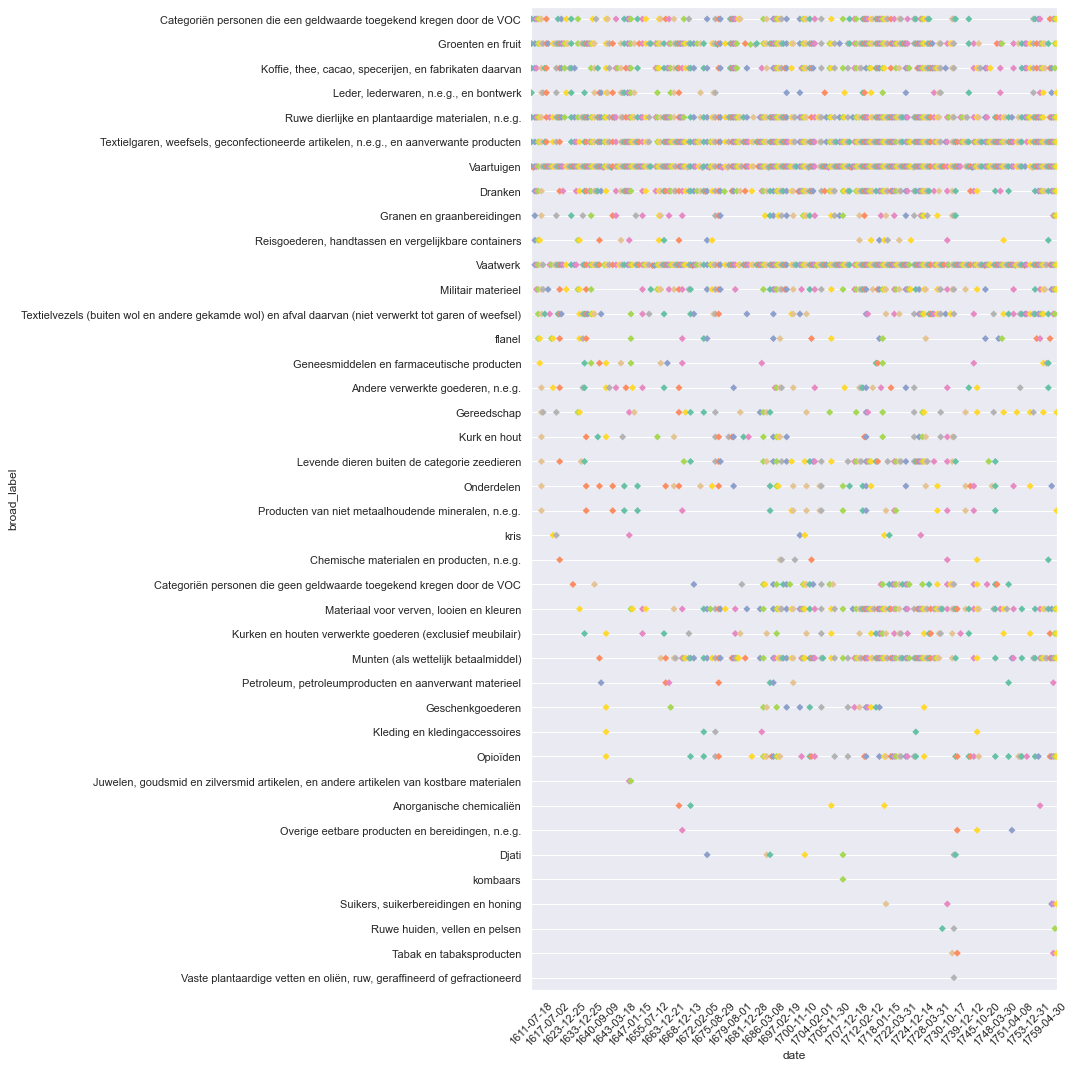

In [249]:
plt.figure(figsize=(15,15))
plot = sns.stripplot(x='date',y='broad_label', #hue='count', 
                     data=df_categories,
                    palette='Set2',
                    size=5,jitter=False, 
                     marker='D')#, alpha=.50)

plt.xticks(rotation=45)

new_ticks = [i.get_text() for i in plot.get_xticklabels()]
plt.xticks(range(0, len(new_ticks), 10), new_ticks[::10])
# wrap_labels(plot)
plt.tight_layout()

# Get the first two and last y-tick positions.
miny, nexty, *_, maxy = plot.get_yticks()

# Compute half the y-tick interval (for example).
eps = (nexty - miny) / 2  # <-- Your choice.

# Adjust the limits.
plot.set_ylim(maxy+eps, miny-eps)

plt.savefig('categories_of_commodities_over_time.png',bbox_inches="tight")

In [67]:
## Now, let's split the commodities into categories and plot each category in detail

In [17]:
all_categories = set(df_categories['broad_label'].tolist())

In [158]:
len(all_commodities)

159

In [168]:
df_commodities_flat

,date,url,label,broad_label,position
0,1611-07-18,https://digitaalerfgoed.poolparty.biz/globalis...,Noten,Groenten en fruit,1
1,1611-07-18,https://digitaalerfgoed.poolparty.biz/globalis...,Kruidnagel,Groenten en fruit,1
2,1611-07-18,https://digitaalerfgoed.poolparty.biz/globalis...,leer,"Leder, lederwaren, n.e.g., en bontwerk",0
3,1611-07-18,https://digitaalerfgoed.poolparty.biz/globalis...,serge,"Leder, lederwaren, n.e.g., en bontwerk",0
4,1611-07-18,https://digitaalerfgoed.poolparty.biz/globalis...,Tot slaaf gemaakte,Categoriën personen die een geldwaarde toegeke...,2
...,...,...,...,...,...
3673,1766-04-08,https://digitaalerfgoed.poolparty.biz/globalis...,Pan,"Reisgoederen, handtassen en vergelijkbare cont...",0
3674,1766-04-08,https://digitaalerfgoed.poolparty.biz/globalis...,Vaartuigen,Vaartuigen,2
3675,1766-04-08,https://digitaalerfgoed.poolparty.biz/globalis...,Kop,"Reisgoederen, handtassen en vergelijkbare cont...",0
3676,1766-04-08,https://digitaalerfgoed.poolparty.biz/globalis...,grein,"Leder, lederwaren, n.e.g., en bontwerk",0


In [113]:
def plot_category(category):
#     sns.set()
    plt.figure(figsize=(16,4))
    plot = sns.stripplot(x=df_commodities_flat['date'],y='label', #hue='count', 
                     data=df_commodities_flat[df_commodities_flat['broad_label']==category],
                    palette='Set2',
                    size=5,jitter=False,#dodge=True,
                     marker='D')#, alpha=.50)

    plt.xticks(rotation=45)

    new_ticks = [i.get_text() for i in plot.get_xticklabels()]
    num_ticks = len(new_ticks)
    space = 9

    print(range(0, len(new_ticks)+space, space))
    plt.xticks(range(0, len(new_ticks)+space, space), new_ticks[::space])
    # wrap_labels(plot)
#     plt.tight_layout()

    # Get the first two and last y-tick positions.
    miny, nexty, *_, maxy = plot.get_yticks()

    # Compute half the y-tick interval (for example).
    eps = (nexty - miny) / 2  # <-- Your choice.

    # Adjust the limits.
    plot.set_ylim(maxy+eps, miny-eps)
#     plot.set_xlim(all_dates[-1], all_dates[0])

range(0, 327, 9)


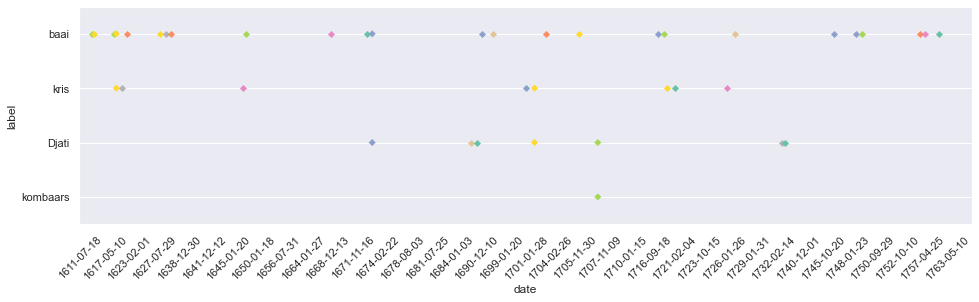

In [115]:
plot_category('flanel')

range(0, 327, 9)


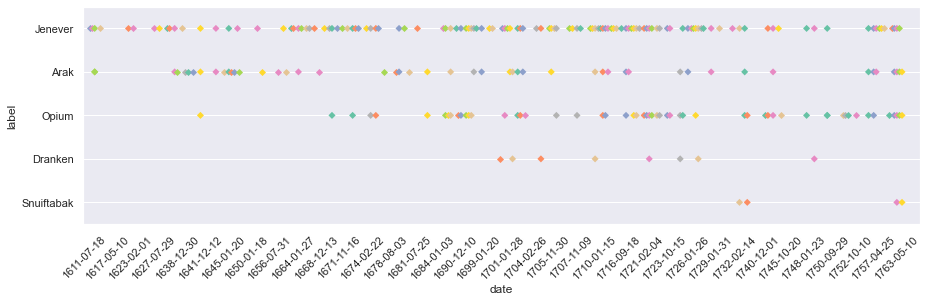

In [106]:
plot_category('Dranken')

In [ ]:
# plotting a heatma